In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_SEED = 2022

In [4]:
df = pd.read_csv('/content/drive/MyDrive/KBL Prediction/dataset/recent_avg_record_update1.csv')

In [5]:
df

,Unnamed: 0,gmkey,tcode,score,loss,benchScoreCn,bf,bs,defr,dk,...,tf,tfb,threep,threepA,to,tto,turnoverScoreCn,wft,woft,stl
0,0,S17G01N1,70,86,99,0.0,0.0,4.2,17.0,1.8,...,0.0,1.8,10.4,24.0,11.6,0.6,0.0,10.6,9.4,6.4
1,1,S17G01N1,10,99,86,0.0,0.2,5.2,21.8,2.6,...,0.4,4.4,5.2,15.6,9.6,0.2,0.0,9.8,11.4,7.2
2,2,S17G01N2,65,86,88,0.0,0.0,1.6,23.6,1.2,...,0.2,3.6,5.8,16.0,13.2,1.2,0.0,8.8,11.6,5.6
3,3,S17G01N2,35,88,86,0.0,0.0,3.0,23.6,2.2,...,0.2,4.0,6.2,17.4,14.4,1.0,0.0,9.0,10.6,6.8
4,4,S17G01N3,60,67,71,0.0,0.0,1.8,15.6,2.6,...,0.6,4.0,9.2,23.8,8.4,0.8,0.0,12.0,12.0,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290,7290,S40G01N36,68,95,106,14.2,0.0,1.8,23.2,0.0,...,0.0,6.6,9.2,30.8,13.6,0.2,12.8,11.6,10.0,8.4
7291,7291,S40G01N37,18,98,105,15.2,0.0,2.8,24.0,0.0,...,0.0,6.0,10.4,32.4,9.6,0.2,16.4,6.4,10.2,9.0
7292,7292,S40G01N37,19,105,98,32.8,0.0,2.0,29.8,0.0,...,0.0,4.4,7.2,25.2,10.4,1.2,13.6,8.6,8.6,7.6
7293,7293,S40G01N38,24,71,80,26.2,0.0,1.4,27.8,0.0,...,0.2,5.2,6.6,24.2,14.0,0.4,11.6,12.6,9.2,6.8


In [6]:
df.columns

Index(['Unnamed: 0', 'gmkey', 'tcode', 'score', 'loss', 'benchScoreCn', 'bf',
       'bs', 'defr', 'dk', 'dkA', 'ef', 'fb', 'fbScoreCn', 'fg', 'fgA', 'fgt',
       'fgtA', 'foul', 'foulout', 'ft', 'ftA', 'gd', 'idf', 'inout', 'inout1',
       'maxContiScoreCn', 'maxLeadScoreCn', 'offr', 'playMin', 'playSec', 'pp',
       'ppA', 'pscore', 'rb', 'scoreHighTimeCn', 'secChanceScoreCn', 'ast',
       'teamR', 'tf', 'tfb', 'threep', 'threepA', 'to', 'tto',
       'turnoverScoreCn', 'wft', 'woft', 'stl'],
      dtype='object')

In [13]:
df[df['score'] > df['loss']]

,Unnamed: 0,gmkey,tcode,score,loss,benchScoreCn,bf,bs,defr,dk,...,tf,tfb,threep,threepA,to,tto,turnoverScoreCn,wft,woft,stl
1,1,S17G01N1,10,99,86,0.0,0.2,5.2,21.8,2.6,...,0.4,4.4,5.2,15.6,9.6,0.2,0.0,9.8,11.4,7.2
3,3,S17G01N2,35,88,86,0.0,0.0,3.0,23.6,2.2,...,0.2,4.0,6.2,17.4,14.4,1.0,0.0,9.0,10.6,6.8
5,5,S17G01N3,6,71,67,0.0,0.0,2.0,18.6,0.4,...,0.0,4.6,6.8,17.6,13.4,1.6,0.0,6.2,11.6,10.8
6,6,S17G01N4,16,91,79,0.0,0.0,3.0,19.0,0.6,...,0.2,2.4,5.6,18.4,10.2,0.2,0.0,8.2,11.2,4.8
8,8,S17G01N5,50,91,81,0.0,0.0,2.4,23.8,0.4,...,0.2,2.0,5.6,17.2,11.0,0.8,0.0,7.0,13.6,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,7286,S40G01N34,31,84,82,23.4,0.0,2.2,22.6,0.0,...,0.0,3.6,10.0,35.8,9.4,1.6,11.2,11.2,9.8,7.8
7287,7287,S40G01N35,31,90,76,21.8,0.0,1.6,22.2,0.0,...,0.0,3.4,9.8,34.6,11.2,1.0,10.2,10.2,10.0,6.8
7289,7289,S40G01N36,29,106,95,33.2,0.0,2.4,30.6,0.8,...,0.0,5.8,8.2,23.6,11.6,0.8,13.4,9.8,9.0,7.0
7292,7292,S40G01N37,19,105,98,32.8,0.0,2.0,29.8,0.0,...,0.0,4.4,7.2,25.2,10.4,1.2,13.6,8.6,8.6,7.6


In [ ]:
X = df.iloc[:, 5:-1]
X.drop(columns=['ef','maxContiScoreCn', 'maxLeadScoreCn', 'playMin', 'playSec', 'scoreHighTimeCn', 'inout', 'inout1', 'idf'], inplace=True)
y = df.iloc[:,3]

In [ ]:
X

,benchScoreCn,bf,bs,defr,dk,dkA,fb,fbScoreCn,fg,fgA,...,teamR,tf,tfb,threep,threepA,to,tto,turnoverScoreCn,wft,woft
0,0.0,0.0,4.2,17.0,1.8,2.2,0.0,0.0,19.8,36.4,...,2.8,0.0,1.8,10.4,24.0,11.6,0.6,0.0,10.6,9.4
1,0.0,0.2,5.2,21.8,2.6,2.6,0.0,0.0,29.8,47.4,...,2.2,0.4,4.4,5.2,15.6,9.6,0.2,0.0,9.8,11.4
2,0.0,0.0,1.6,23.6,1.2,1.4,0.0,0.0,21.6,40.6,...,2.4,0.2,3.6,5.8,16.0,13.2,1.2,0.0,8.8,11.6
3,0.0,0.0,3.0,23.6,2.2,2.4,0.0,0.0,22.6,39.4,...,3.0,0.2,4.0,6.2,17.4,14.4,1.0,0.0,9.0,10.6
4,0.0,0.0,1.8,15.6,2.6,2.6,0.0,0.0,21.8,39.8,...,3.0,0.6,4.0,9.2,23.8,8.4,0.8,0.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290,14.2,0.0,1.8,23.2,0.0,0.0,0.0,13.6,20.8,41.6,...,4.4,0.0,6.6,9.2,30.8,13.6,0.2,12.8,11.6,10.0
7291,15.2,0.0,2.8,24.0,0.0,0.0,0.0,12.0,20.4,41.6,...,3.0,0.0,6.0,10.4,32.4,9.6,0.2,16.4,6.4,10.2
7292,32.8,0.0,2.0,29.8,0.0,0.0,0.0,8.8,26.0,47.6,...,3.0,0.0,4.4,7.2,25.2,10.4,1.2,13.6,8.6,8.6
7293,26.2,0.0,1.4,27.8,0.0,0.0,0.0,10.0,26.8,49.0,...,4.0,0.2,5.2,6.6,24.2,14.0,0.4,11.6,12.6,9.2


In [ ]:
len(X.columns)

34

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=34)
pca_array = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_array, index=X.index,
                      columns=[f"pca{num+1}" for num in range(X.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34
0,-18.312413,0.373002,10.216619,5.407018,-6.915377,6.584183,-0.775048,-0.650285,1.094020,1.018689,...,-0.211339,-0.056881,0.159868,0.024845,2.049421e-13,1.223640e-14,1.186189e-14,-4.080903e-14,2.885730e-15,-3.443565e-15
1,1.978136,-29.365043,-2.653475,-2.571838,-1.462549,8.544544,0.741299,-2.317583,0.598578,1.708822,...,0.171455,-0.073604,-0.128171,0.079035,8.378653e-14,1.323893e-14,-1.916181e-14,-3.632098e-14,2.078860e-14,-4.125860e-15
2,-15.451151,-6.237009,5.711287,-1.992640,-2.591552,-1.989982,4.150754,-0.571169,3.650827,-0.218583,...,0.013860,0.142268,0.066309,-0.050186,2.601736e-14,-5.297887e-15,-3.547750e-15,6.043495e-15,1.694327e-15,2.509467e-17
3,-9.478707,-14.539692,7.324863,-2.937216,2.666162,3.659437,4.916299,-0.592307,1.709558,-0.498089,...,-0.060764,-0.047468,0.031920,-0.037108,-2.668047e-15,7.001997e-17,8.436109e-15,5.751333e-15,-8.855052e-15,3.955515e-15
4,-13.154372,-7.039957,8.186661,2.394276,-1.825048,10.371699,-7.763640,-0.240089,0.804182,0.247056,...,0.243018,-0.192080,-0.146431,-0.213661,4.338272e-14,6.413682e-14,4.015308e-14,4.460599e-14,6.275697e-14,-1.522589e-14


In [ ]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(X.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,4.077180e+02,5.461276e-01,0.546128
pca2,2.009627e+02,2.691842e-01,0.815312
pca3,3.682615e+01,4.932766e-02,0.864639
pca4,2.319019e+01,3.106266e-02,0.895702
pca5,1.624622e+01,2.176139e-02,0.917464
pca6,1.282565e+01,1.717963e-02,0.934643
pca7,1.154318e+01,1.546179e-02,0.950105
pca8,8.592046e+00,1.150882e-02,0.961614
pca9,5.917569e+00,7.926429e-03,0.969540
pca10,3.815715e+00,5.111050e-03,0.974651


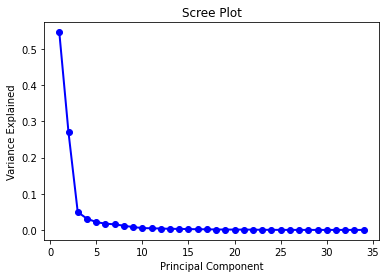

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=printcipalComponents)
sum(pca.explained_variance_ratio_)
# 주성분으로 이루어진 데이터 프레임 구성

0.864639465529897

In [ ]:
principalDf

,0,1,2
0,-18.312413,0.373002,10.216619
1,1.978136,-29.365043,-2.653475
2,-15.451151,-6.237009,5.711287
3,-9.478707,-14.539692,7.324863
4,-13.154372,-7.039957,8.186661
...,...,...,...
7290,11.572906,5.588201,-0.282002
7291,15.799187,3.943379,-1.052144
7292,33.424904,3.944229,-7.146205
7293,26.050802,1.657905,-8.467790


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(principalDf, y, train_size=0.8, random_state=RANDOM_SEED)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeRegressor()
gb_model = GradientBoostingRegressor()
xgb_model = XGBRegressor()
lgb_model = LGBMRegressor()

In [ ]:
gb_param = {'learning_rate':[0.025, 0.03, 0.035],
            'n_estimators':[100, 150, 200, 250]
            }

grid_gb = GridSearchCV(gb_model, param_grid=gb_param, cv=3, refit=True, verbose=2)

In [ ]:
xgb_param = {'objective': ['reg:squarederror'],
              'n_estimators':[100, 150, 200, 250],
              'learning_rate':[0.025, 0.03, 0.035],
              'max_depth': [3, 4, 5, 6],
              'n_jobs': [-1]
              }

grid_xgb = GridSearchCV(xgb_model, param_grid=xgb_param, cv=3, refit=True, verbose=2)

In [ ]:
lgb_param = {'n_estimators':[100, 150, 200, 250],
             'learning_rate':[0.025, 0.03, 0.035],
             'n_jobs': [-1]
              }

grid_lgb = GridSearchCV(lgb_model, param_grid=lgb_param, cv=3, refit=True, verbose=2)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
grid_gb.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..............learning_rate=0.025, n_estimators=100; total time=   0.5s
[CV] END ..............learning_rate=0.025, n_estimators=100; total time=   0.4s
[CV] END ..............learning_rate=0.025, n_estimators=100; total time=   0.4s
[CV] END ..............learning_rate=0.025, n_estimators=150; total time=   0.7s
[CV] END ..............learning_rate=0.025, n_estimators=150; total time=   0.7s
[CV] END ..............learning_rate=0.025, n_estimators=150; total time=   0.7s
[CV] END ..............learning_rate=0.025, n_estimators=200; total time=   0.9s
[CV] END ..............learning_rate=0.025, n_estimators=200; total time=   0.9s
[CV] END ..............learning_rate=0.025, n_estimators=200; total time=   0.9s
[CV] END ..............learning_rate=0.025, n_estimators=250; total time=   1.1s
[CV] END ..............learning_rate=0.025, n_estimators=250; total time=   1.2s
[CV] END ..............learning_rate=0.025, n_es

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.025, 0.03, 0.035],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=2)

In [ ]:
grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END learning_rate=0.025, max_depth=3, n_estimators=100, n_jobs=-1, objective=reg:squarederror; total time=   0.1s
[CV] END learning_rate=0.025, max_depth=3, n_estimators=100, n_jobs=-1, objective=reg:squarederror; total time=   0.1s
[CV] END learning_rate=0.025, max_depth=3, n_estimators=100, n_jobs=-1, objective=reg:squarederror; total time=   0.1s
[CV] END learning_rate=0.025, max_depth=3, n_estimators=150, n_jobs=-1, objective=reg:squarederror; total time=   0.2s
[CV] END learning_rate=0.025, max_depth=3, n_estimators=150, n_jobs=-1, objective=reg:squarederror; total time=   0.2s
[CV] END learning_rate=0.025, max_depth=3, n_estimators=150, n_jobs=-1, objective=reg:squarederror; total time=   0.2s
[CV] END learning_rate=0.025, max_depth=3, n_estimators=200, n_jobs=-1, objective=reg:squarederror; total time=   0.3s
[CV] END learning_rate=0.025, max_depth=3, n_estimators=200, n_jobs=-1, objective=reg:squarederror; total

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.025, 0.03, 0.035],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250], 'n_jobs': [-1],
                         'objective': ['reg:squarederror']},
             verbose=2)

In [ ]:
grid_lgb.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...learning_rate=0.025, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END ...learning_rate=0.025, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END ...learning_rate=0.025, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END ...learning_rate=0.025, n_estimators=150, n_jobs=-1; total time=   0.2s
[CV] END ...learning_rate=0.025, n_estimators=150, n_jobs=-1; total time=   0.1s
[CV] END ...learning_rate=0.025, n_estimators=150, n_jobs=-1; total time=   0.1s
[CV] END ...learning_rate=0.025, n_estimators=200, n_jobs=-1; total time=   0.2s
[CV] END ...learning_rate=0.025, n_estimators=200, n_jobs=-1; total time=   0.2s
[CV] END ...learning_rate=0.025, n_estimators=200, n_jobs=-1; total time=   0.2s
[CV] END ...learning_rate=0.025, n_estimators=250, n_jobs=-1; total time=   0.2s
[CV] END ...learning_rate=0.025, n_estimators=250, n_jobs=-1; total time=   0.2s
[CV] END ...learning_rate=0.025, n_estimators=25

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.025, 0.03, 0.035],
                         'n_estimators': [100, 150, 200, 250], 'n_jobs': [-1]},
             verbose=2)

In [ ]:
gb = grid_gb.best_estimator_
xgb = grid_xgb.best_estimator_
lgb = grid_lgb.best_estimator_

In [ ]:
print("dt_score : ", dt_model.score(X_test, y_test))
print("gb_score : ", gb.score(X_test, y_test))
print("xgb_score : ", xgb.score(X_test, y_test))
print("lgb_score : ", lgb.score(X_test, y_test))

dt_score :  -0.8519397039826404
gb_score :  0.08083684864725504
xgb_score :  0.0779463795318881
lgb_score :  0.07953803168544715


In [ ]:
from sklearn.metrics import explained_variance_score, r2_score

print(explained_variance_score(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.05154887724967816
0.04883030243657582


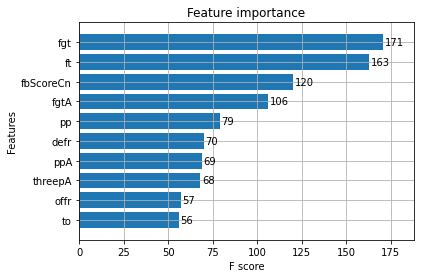

In [ ]:
xgboost.plot_importance(xgb, height=0.8, max_num_features=10)
plt.show()